# [Preprocess](https://huggingface.co/docs/transformers/preprocessing)

1. [NLP](#NLP)
2. [Audio](#audio)
3. [Computer vision](#computer-vision)
4. [Multimodal](#multimodal)

In [1]:
#functions
#def print_

def print_dict(input:dict):
    print("\n".join("{}: {}".format(k,v) for k, v in input.items()))

## Abstract

- Text, use a Tokenizer to convert text into a sequence of tokens, create a numerical representation of the tokens, and assemble them into tensors.
- Speech and audio, use a Feature extractor to extract sequential features from audio waveforms and convert them into tensors.
- Image inputs use a ImageProcessor to convert images into tensors.
- Multimodal inputs, use a Processor to combine a tokenizer and a feature extractor or image processor.

## NLP

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
encoded_input = tokenizer("Do not middle in the affairs of wizards, for they are subtle and quick to anger.")

print(type(encoded_input))
print_dict(encoded_input)

<class 'transformers.tokenization_utils_base.BatchEncoding'>
input_ids: [101, 2091, 1136, 2243, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119, 102]
token_type_ids: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


- input_idx : the indices corresponding to each token in the sentence
- token_type_ids : which sequence a token belongs to when there is more than one sequence
- attention_mask : whether a token should be attended to or not

In [3]:
tokenizer.decode(encoded_input["input_ids"])

'[CLS] Do not middle in the affairs of wizards, for they are subtle and quick to anger. [SEP]'

In [4]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_inputs = tokenizer(batch_sentences)
print_dict(encoded_inputs)

input_ids: [[101, 1252, 1184, 1164, 1248, 6462, 136, 102], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102]]
token_type_ids: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
attention_mask: [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]


### Build Tensor
- padding : Padding ensures tensors be rectangular by adding a padding token to shorter sentences.
- truncation : truncate the sequence to be shorter than the max length accepted by the model.
- return_tensors : PyTorch : "pt", Tensorflow : "tf" 

In [5]:
encoded_inputs = tokenizer(batch_sentences,padding=True,truncation=True,return_tensors='pt')
print_dict(encoded_inputs)

input_ids: tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]])
token_type_ids: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])


In [6]:
for ids in encoded_inputs['input_ids']:
    print(tokenizer.decode(ids))

[CLS] But what about second breakfast? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[CLS] Don't think he knows about second breakfast, Pip. [SEP]
[CLS] What about elevensies? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


## Audio

Before preprocessing, load the MlnDS-14 dataset to see how you can use a feature extractor with audio datasets.

In [7]:
from datasets import load_dataset, Audio
dataset = load_dataset("PolyAI/minds14",name='en-US',split='train')

dataset[0]

/home/doeun/anaconda3/lib/python3.9/site-packages/datasets/load.py:1454: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


{'path': '/home/doeun/.cache/huggingface/datasets/downloads/extracted/62895c44976ebfd857a1155c55705d3d0aafa6ac4c94074efed7e4641de4fc3c/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'audio': {'path': '/home/doeun/.cache/huggingface/datasets/downloads/extracted/62895c44976ebfd857a1155c55705d3d0aafa6ac4c94074efed7e4641de4fc3c/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.        ,  0.        ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to set up a joint account with my partner',
 'english_transcription': 'I would like to set up a joint account with my partner',
 'intent_class': 11,
 'lang_id': 4}

In [8]:
dataset[0]['audio']

{'path': '/home/doeun/.cache/huggingface/datasets/downloads/extracted/62895c44976ebfd857a1155c55705d3d0aafa6ac4c94074efed7e4641de4fc3c/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

- array : the speech signal loaded (and potentially resampled) as a 1D array.
- path : the location of the audio file
- sampling_rate : how many data points are measured per a second.

In this tutorial, you will use the Wav2Vec2 model. Since Wav2Vec2 is pretrained on 16kHz sampled speech audio, you need to resample your data.

In [9]:
dataset = dataset.cast_column('audio',Audio(sampling_rate=16_000))

dataset[0]['audio']

{'path': '/home/doeun/.cache/huggingface/datasets/downloads/extracted/62895c44976ebfd857a1155c55705d3d0aafa6ac4c94074efed7e4641de4fc3c/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 1.70562416e-05,  2.18727451e-04,  2.28099874e-04, ...,
         3.43842403e-05, -5.96364771e-06, -1.76846661e-05]),
 'sampling_rate': 16000}

In [10]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained('facebook/wav2vec2-base')
audio_input = [dataset[0]['audio']['array']]
feature_extractor(audio_input,sampling_rate=16000)

/home/doeun/anaconda3/lib/python3.9/site-packages/transformers/configuration_utils.py:365: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


{'input_values': [array([ 3.0293269e-04,  2.7676334e-03,  2.8821775e-03, ...,
        5.1470479e-04,  2.1597825e-05, -1.2164921e-04], dtype=float32)]}

In [11]:
print(dataset[0]['audio']['array'].shape)
print(dataset[1]['audio']['array'].shape)

(173398,)
(106496,)


In [12]:
def preprocess_function(examples):
    audio_arrays = [x['array'] for x in examples['audio']]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate = 16000,
        padding = True,
        max_length = 100000,
        truncation = True
    )
    return inputs

In [13]:
processed_dataset = preprocess_function(dataset[:5])

processed_dataset

{'input_values': [array([ 0.0003766 ,  0.00283419,  0.0029484 , ..., -0.0006577 ,
        0.00274966,  0.0046367 ], dtype=float32), array([9.8649514e-05, 3.7331809e-03, 6.9454443e-03, ..., 1.3289674e-02,
       1.8929785e-02, 1.9546989e-02], dtype=float32), array([ 2.2214372e-04,  5.0335709e-04,  2.9261643e-04, ...,
       -2.6318517e+00, -2.1792681e+00, -1.7696079e+00], dtype=float32), array([ 2.8103753e-03,  1.9075018e-03,  2.7828189e-04, ...,
       -1.3701995e-05, -1.3701995e-05, -1.3701995e-05], dtype=float32), array([-2.2644836e-03, -1.0359620e-03,  4.2160173e-06, ...,
        1.3075898e-05,  1.3075898e-05,  1.3075898e-05], dtype=float32)]}

In [14]:
print(processed_dataset['input_values'][0].shape)
print(processed_dataset['input_values'][1].shape)

(100000,)
(100000,)


## Computer vision

The steps include resizing, normalizing, color channel correction, and converting images to tensors.

First, load the food101 dataset to see how you can use an image processor with computer vision datasets

In [15]:
from datasets import load_dataset

dataset = load_dataset('food101',split = 'train[:100]')
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 100
})

In [16]:
dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512>,
 'label': 6}

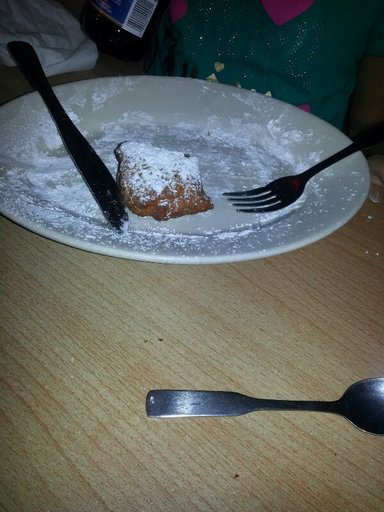

In [17]:
dataset[0]['image']

In [18]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224')

1. Here we use Compose to chain together a couple of transforms - RandomResizedCrop and ColorJitter. Note that for resizing, we can get the image size requirements from the image_processor. Form some models, an exact height and width are expected, for others only the shortest_edge is defined

In [19]:
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

size = (
    image_processor.size['shortest_edge']
    if "shortest_edge" in image_processor.size
    else (image_processor.size['height'],image_processor.size['width'])
)

_transforms = Compose([RandomResizedCrop(size),ColorJitter(brightness=0.5,hue=0.5)])

2. The model accepts pixel_values as its input. ImageProcessor can take care of normalizing the images, and generating appropriate tensors. Create a function that combines image augmentation and image preprocessing for a batch of images and generates pixel_values.

In [20]:
def transforms(examples):
    images = [_transforms(img.convert("RGB")) for img in examples["image"]]
    examples['pixel_values'] = image_processor(images, do_resize=False,return_tensors='pt')['pixel_values']
    return examples

3. Then use HuggingFace Datasets set_transform to apply the transforms

In [21]:
dataset.set_transform(transforms)

dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 100
})

In [22]:
dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512>,
 'label': 6,
 'pixel_values': tensor([[[ 0.4510,  0.6471,  0.7569,  ..., -0.6941, -0.6941, -0.6314],
          [ 0.3333,  0.4667,  0.7569,  ..., -0.6863, -0.7176, -0.6392],
          [ 0.3333,  0.2941,  0.6000,  ..., -0.5529, -0.7333, -0.6863],
          ...,
          [-0.4510, -0.3412, -0.3098,  ..., -0.3647, -0.3412, -0.3020],
          [-0.5059, -0.3804, -0.3412,  ..., -0.4510, -0.4431, -0.3804],
          [-0.4275, -0.4431, -0.3882,  ..., -0.4510, -0.4824, -0.3725]],
 
         [[ 0.0588,  0.2627,  0.3647,  ..., -0.5529, -0.5059, -0.4118],
          [-0.0510,  0.0824,  0.3647,  ..., -0.5373, -0.5294, -0.4118],
          [-0.0510, -0.0902,  0.2157,  ..., -0.4039, -0.5529, -0.4667],
          ...,
          [-0.2863, -0.1843, -0.1686,  ..., -0.0275, -0.0039,  0.0431],
          [-0.3255, -0.2235, -0.2078,  ..., -0.1137, -0.0824, -0.0353],
          [-0.2471, -0.2706, -0.2314,  ..., -0.1137, -0.1451, -0.0275]]

4. Now when you access the image, you will notice the image processor thas added pixel_values. You can pass your processed dataset to the model now.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


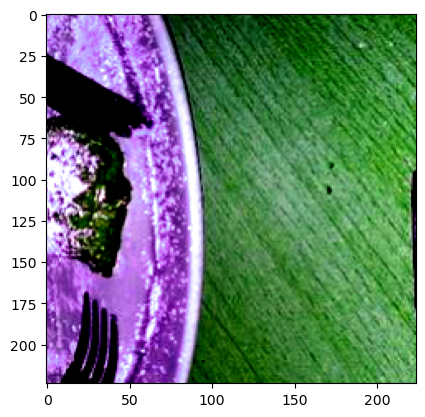

In [23]:
import numpy as np
import matplotlib.pyplot as plt 

img = dataset[0]['pixel_values']
plt.imshow(img.permute(2,1,0))

In [24]:
img.shape

torch.Size([3, 224, 224])

In [25]:
(img.permute(1,0,2)).shape

torch.Size([224, 3, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


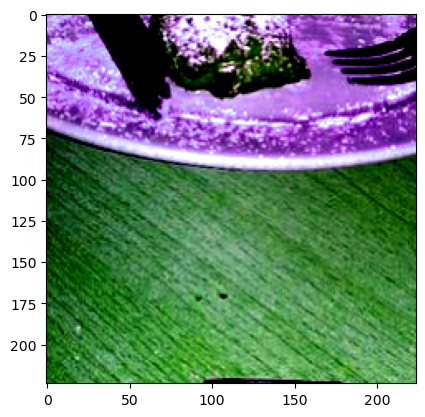

In [26]:
plt.imshow(img.permute(1,2,0))

### Pad
in some cases, the model applies scale augmentation at training time. This may cause images to be different sizes in a batch. You can use DetImageProcessor.pad() from DetrImageProcessor and define a custom collate_fn to batch images together

In [27]:
def collate_fn(batch):
    pixel_values = [item['pixel_values'] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors='pt')
    labels = [item['lables'] for item in batch]
    batch = {}
    batch["pixel_values"]= encoding['pixel_values']
    batch["pixel_mask"]= encoding["pixel_mask"]
    batch["labels"]=labels 
    return batch

## Multimodal

Load the LJ Speech dataset to see how uou can use a processor for automatic speech recognition (ASR).


In [28]:
from datasets import load_dataset

lj_speech = load_dataset('lj_speech',split='train')

In [29]:
lj_speech

Dataset({
    features: ['id', 'audio', 'file', 'text', 'normalized_text'],
    num_rows: 13100
})

In [30]:
lj_speech[0]

{'id': 'LJ001-0001',
 'audio': {'path': 'LJ001-0001.wav',
  'array': array([-7.32421875e-04, -7.62939453e-04, -6.40869141e-04, ...,
          7.32421875e-04,  2.13623047e-04,  6.10351562e-05]),
  'sampling_rate': 22050},
 'file': '/storage/hf-datasets-cache/heavy/datasets/99585803243503-config-parquet-and-info-lj_speech-4e2d0af0/downloads/extracted/034012ae2b5e0aa215c21354dfc93ab72d895d00717e088a2affe73ee49d0b98/LJSpeech-1.1/wavs/LJ001-0001.wav',
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'normalized_text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'}

For ASR, you're mainly focused on audio and text so you can remove the other columns.

In [31]:
lj_speech = lj_speech.map(remove_columns=['file','id','normalized_text'])

lj_speech[0]['audio']

{'path': 'LJ001-0001.wav',
 'array': array([-7.32421875e-04, -7.62939453e-04, -6.40869141e-04, ...,
         7.32421875e-04,  2.13623047e-04,  6.10351562e-05]),
 'sampling_rate': 22050}

In [32]:
lj_speech[0]['text']

'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'

Resampling to the sampling rate of dataset used to pretrain a model. Load a processor.

In [33]:
lj_speech = lj_speech.cast_column('audio',Audio(sampling_rate = 16000)) 

from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained('facebook/wav2vec2-base-960h')

1. Create a function to process the audio data contained in array to input_values, and tokenize text to labels. These are inputs to the model

In [34]:
def prepare_dataset(example):
    audio = example['audio']
    example.update(processor(audio=audio['array'],text=example['text'],sampling_rate=16000))
    return example

2. Apply the prepare_dataset function to a sample

In [35]:
sample_lj = prepare_dataset(lj_speech[0])

sample_lj

{'audio': {'path': 'LJ001-0001.wav',
  'array': array([-0.00061751, -0.00074496, -0.00068972, ...,  0.00068615,
          0.00013802,  0.        ]),
  'sampling_rate': 16000},
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'input_values': [array([-6.4672441e-03, -7.7975024e-03, -7.2209686e-03, ...,
          7.1398341e-03,  1.4186004e-03, -2.1961636e-05], dtype=float32)],
 'labels': [23,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
 

The processor has now added input_values and labels, and the sampling rate has also been correctly downsampled to 16kHz.